In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
graph = nx.read_pajek('../data/graphs/skofja-loka.net')

In [9]:
latitude = []
longitude = []
with open('../data/graphs/skofja-loka.net', 'r', encoding="utf-8") as f:
    for line in f.readlines():
        if(line.strip().endswith("address")):
            vals = line.strip().split(" ")
            latitude.append(float(vals[6]))
            longitude.append(float(vals[8]))
        elif(line.startswith("*edges")):
            break

([], <a list of 0 Text yticklabel objects>)

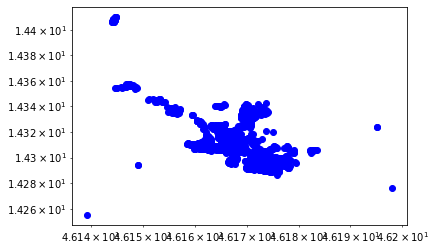

In [27]:
plt.plot(latitude, longitude, 'bo')
plt.yscale('log')
plt.xscale('log')
plt.xticks([])
plt.yticks([])

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
from shapely.geometry import Point, Polygon

In [10]:
df = pd.DataFrame(
    {'lat': latitude,
     'lon': longitude
    })

In [11]:
df

,lat,lon
0,46.197947,14.275957
1,46.165116,14.306838
2,46.165442,14.306919
3,46.167008,14.305362
4,46.149038,14.293988
...,...,...
2221,46.172378,14.340084
2222,46.173186,14.339853
2223,46.170035,14.297536
2224,46.169685,14.297659


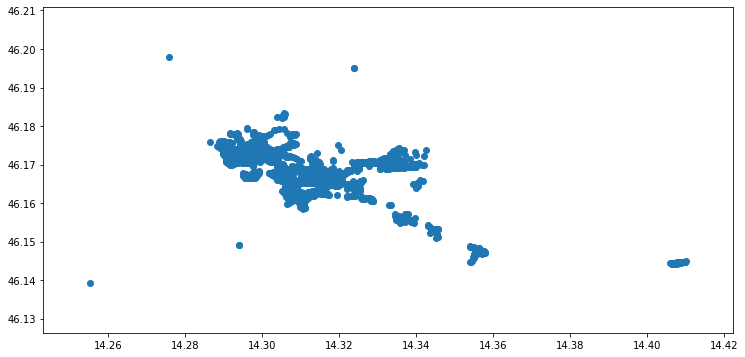

In [17]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
gdf.plot(figsize=(13, 6))

In [25]:
from sklearn.cluster import KMeans

X = np.column_stack((longitude, latitude))
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

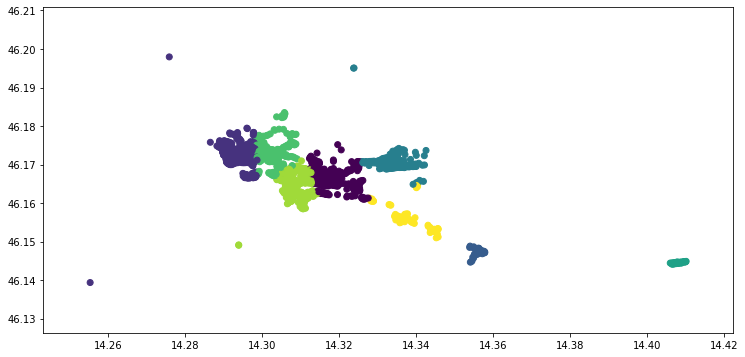

In [26]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
gdf.plot(figsize=(13, 6), c=kmeans.labels_)